In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/new_AR/

/content/drive/My Drive/new_AR


In [3]:
import pandas as pd

In [4]:
import pandas as pd
conf = pd.read_csv("test_data_90.csv", index_col = 0)
tfidf = pd.read_csv("tfidf_90.csv", index_col = 0)

In [5]:
print(len(conf.iloc[0,:-2]))
print(len(tfidf.iloc[0,:]))

53
53


In [6]:
result=[]
category = []
image = []
for i in range(len(conf)):
  result.append(conf.iloc[i,:-2] * tfidf.loc[conf.iloc[i,-2]])
  category.append(conf.iloc[i,-2])
  image.append(conf.iloc[i,-1])

In [7]:
df1 = pd.DataFrame(category)
df1.columns = ['category']
df2 = pd.DataFrame(image)
df2.columns = ['image']

In [8]:
final_result = pd.concat([pd.DataFrame(result),df1,df2],axis=1)
final_result

,골프공,야구공,셔틀콕,테니스공,탁구공,푸시업바,헬스장갑,폼롤러,아령,악력기,...,파이어스틱,캠핑의자,텐트팩,캠핑테이블,야전삽,전기릴선,부탄가스,손전등,category,image
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,1945514_595.jpg
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,845874_595.jpg
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,2203529_595.jpg
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,2204093_595.jpg
4,0.0,0.0,0.0,0.0,0.126382,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,2243011_595.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby,1664948_598.jpg
5277,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby,1664439_598.jpg
5278,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby,1448317_598.jpg
5279,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby,1512480_598.jpg


# 로지스틱 회귀분석(분류)

In [9]:
matrix = final_result

In [10]:
X=matrix.iloc[:, 0:53]
print(X)

      골프공  야구공  셔틀콕  테니스공       탁구공  푸시업바  헬스장갑  폼롤러   아령  악력기  ...   코펠  \
0     0.0  0.0  0.0   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
1     0.0  0.0  0.0   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
2     0.0  0.0  0.0   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
3     0.0  0.0  0.0   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
4     0.0  0.0  0.0   0.0  0.126382   0.0   0.0  0.0  0.0  0.0  ...  0.0   
...   ...  ...  ...   ...       ...   ...   ...  ...  ...  ...  ...  ...   
5276  0.0  0.0  0.0   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
5277  0.0  0.0  0.0   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
5278  0.0  0.0  0.0   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
5279  0.0  0.0  0.0   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
5280  0.0  0.0  0.0   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  ...  0.0   

      휴대용가스버너  파이어스틱  캠핑의자  텐트팩  캠핑테이블  야전삽  전기릴선  부탄가스  손전등  
0         0.0    0.0   0

In [11]:
y=matrix['category'].tolist()

In [12]:
from sklearn.model_selection import train_test_split

RANDOM_SEED=42
TEST_SPLIT=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SPLIT, shuffle=True, random_state=RANDOM_SEED)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# 데이터에 정규화 적용
# 평균이 0이고 표준편차가 1인 분포를 따르도록 함
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

lgs=LogisticRegression(class_weight='balanced', max_iter = 500)
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

Accuracy: 0.713340
precision:  0.7602223361141232
recall:  0.7133396404919584
f1score:  0.7070958303673429
5-fold_validation score:  0.7137813735662807


Text(113.9222222222222, 0.5, 'predicted label')

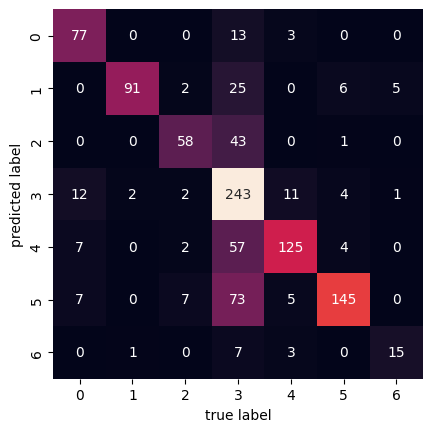

In [15]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_predict=lgs.predict(X_test)
score = cross_val_score(lgs, X_train, y_train, cv=5)
mat = confusion_matrix(y_predict, y_test)
precision = precision_score(y_predict, y_test, average = 'weighted')
recall = recall_score(y_predict, y_test, average = 'weighted')
f1score = f1_score(y_predict, y_test, average= 'weighted')
print("Accuracy: {:f}".format(lgs.score(X_test, y_test)))
print('precision: ', precision)
print('recall: ', recall)
print('f1score: ', f1score)
print('5-fold_validation score: ',score.mean())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [17]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

         art       0.75      0.83      0.79        93
    athletic       0.97      0.71      0.82       129
        baby       0.82      0.57      0.67       102
     camping       0.53      0.88      0.66       275
 health_yoga       0.85      0.64      0.73       195
     medical       0.91      0.61      0.73       237
 pocket_ball       0.71      0.58      0.64        26

    accuracy                           0.71      1057
   macro avg       0.79      0.69      0.72      1057
weighted avg       0.78      0.71      0.72      1057



In [18]:
# save the model to disk
import pickle
filename = 'lgs_model.sav'
pickle.dump(lgs, open(filename, 'wb'))

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
# RBF 기반 SVM모델을 튜닝한다
from sklearn.model_selection import GridSearchCV
import timeit
svc         = SVC(kernel='rbf')
parameters  = {'C':(100, 1e3, 1e4, 1e5),
               'gamma':(1e-8, 1e-7, 1e-6, 1e-5)}
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=3)
start_time  = timeit.default_timer()
grid_search.fit(X_train, y_train)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))
print(grid_search.best_params_)
print(grid_search.best_score_)

# 최적화된 모델의 파라미터를 출력
svc_best = grid_search.best_estimator_
svc_best

--- 43.929s seconds ---
{'C': 1000.0, 'gamma': 1e-05}
0.7523674242424242


SVC(C=1000.0, gamma=1e-05)

In [21]:
# 최적화 파라미터를 사용하여 모델을 Test 한다
accuracy = svc_best.score(X_test, y_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

The accuracy on testing set is: 74.8%


In [22]:
# 개별 클래스멸 성능을 측정한다
prediction = svc_best.predict(X_test)#, Y_test)
report     = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

         art       1.00      0.83      0.91        93
    athletic       0.99      0.74      0.85       129
        baby       1.00      0.57      0.72       102
     camping       0.51      0.98      0.67       275
 health_yoga       0.95      0.68      0.79       195
     medical       1.00      0.61      0.76       237
 pocket_ball       1.00      0.58      0.73        26

    accuracy                           0.75      1057
   macro avg       0.92      0.71      0.78      1057
weighted avg       0.86      0.75      0.76      1057



In [23]:
# 학습 모델의 정확도 측정
accuracy = svm.score(X_test, y_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

The accuracy on testing set is: 75.0%


In [24]:
# 학습된 내용을 자세히 살펴보기
from sklearn.metrics import classification_report
prediction = svm.predict(X_test)
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

         art       1.00      0.83      0.91        93
    athletic       0.99      0.74      0.85       129
        baby       1.00      0.57      0.72       102
     camping       0.52      0.97      0.68       275
 health_yoga       0.94      0.68      0.79       195
     medical       0.93      0.63      0.75       237
 pocket_ball       1.00      0.58      0.73        26

    accuracy                           0.75      1057
   macro avg       0.91      0.71      0.78      1057
weighted avg       0.85      0.75      0.76      1057



Accuracy: 0.748344
precision:  0.8189338520130365
recall:  0.750236518448439
f1score:  0.7395209246943769
5-fold_validation score:  0.7528433214616227


Text(113.9222222222222, 0.5, 'predicted label')

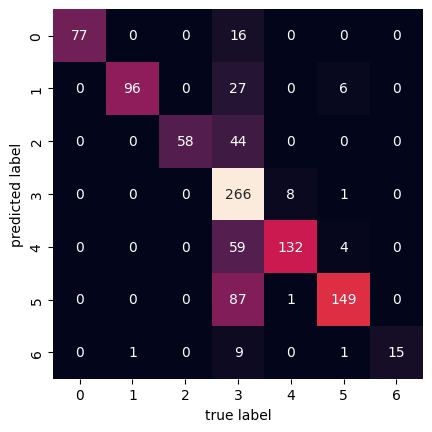

In [25]:
score = cross_val_score(svc_best, X_train, y_train, cv=5)
mat = confusion_matrix(prediction, y_test)
precision = precision_score(prediction, y_test, average = 'weighted')
recall = recall_score(prediction, y_test, average = 'weighted')
f1score = f1_score(prediction, y_test, average= 'weighted')
print("Accuracy: {:f}".format(svc_best.score(X_test, y_test)))
print('precision: ', precision)
print('recall: ', recall)
print('f1score: ', f1score)
print('5-fold_validation score: ',score.mean())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [26]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산
mod = MultinomialNB()
mod.fit(X_train, y_train)
predicted = mod.predict(X_test)

report     = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

         art       1.00      0.83      0.91        93
    athletic       1.00      0.70      0.82       129
        baby       1.00      0.57      0.72       102
     camping       0.50      0.96      0.66       275
 health_yoga       0.90      0.64      0.75       195
     medical       0.90      0.60      0.72       237
 pocket_ball       1.00      0.42      0.59        26

    accuracy                           0.73      1057
   macro avg       0.90      0.67      0.74      1057
weighted avg       0.83      0.73      0.74      1057



Accuracy: 0.726585
precision:  0.8053896850714231
recall:  0.7265846736045412
f1score:  0.7164015579372658
5-fold_validation score:  0.7272744608654197


Text(113.9222222222222, 0.5, 'predicted label')

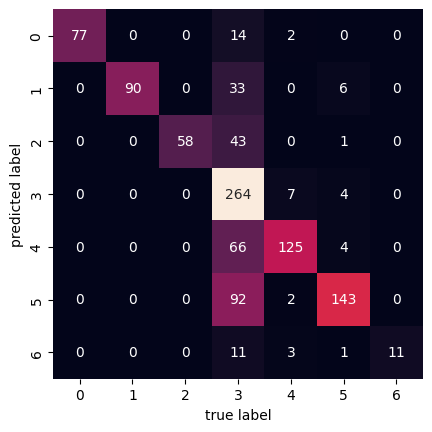

In [28]:
score = cross_val_score(mod, X_train, y_train, cv=5)
mat = confusion_matrix(predicted, y_test)
precision = precision_score(predicted, y_test, average = 'weighted')
recall = recall_score(predicted, y_test, average = 'weighted')
f1score = f1_score(predicted, y_test, average= 'weighted')
print("Accuracy: {:f}".format(mod.score(X_test, y_test)))
print('precision: ', precision)
print('recall: ', recall)
print('f1score: ', f1score)
print('5-fold_validation score: ',score.mean())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')